# **Advances in Data Sciences and Architecture**
## Name : **Rohan Kapadnis**
## NUID : **1342161**
## Assignment 2: **Kaggle**

## **Data :** 

**Id** : Restaurant id. 

**Open Date** : opening date for a restaurant

**City** : City that the restaurant is in. Note that there are unicode in the names. 

**City Group**: Type of the city. Big cities, or Other. 

**Type**: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile

**P1, P2 - P37**: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.

**Revenue**: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

## **Abstract** : 
> *The agenda of this notebook is to predict the revenue for any upcoming setting of restaurant and finding a mathematical model to increase the effectiveness of investments in new restaurant sites. There are three types of restaurant which have been encountered. They are inline(IL), food court(FC), and mobile(M). In the proposed solution, I have taken into consideration the various features of the datasets for the prediction. The input features were ordered based on their impact on the target attribute, restaurant revenue. Pre-processing, feature selection and encoding has been done. Algorithms are then evaluated on the test data after being trained on the training datasets. XGBoost was found to be the best performing model*. 

## Downloading the libraries

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install sklearn

In [ ]:
pip install xgboost

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

## Loading the dataset 

In [16]:
url_train = 'https://raw.githubusercontent.com/rohan-kapadnis/Advances-in-Data-Sciences-and-Architecture/master/Assignment%202%20-%20Kaggle%20Competition/dataset/train.csv'
url_test = 'https://raw.githubusercontent.com/rohan-kapadnis/Advances-in-Data-Sciences-and-Architecture/master/Assignment%202%20-%20Kaggle%20Competition/dataset/test.csv'
test = pd.read_csv(url_test)
raw_df = pd.read_csv(url_train)
raw_df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


## 1. Exploratory Data Analysis

## Dimensions of the Data

In [17]:
print(f"Shape of training data: {raw_df.shape}\nShape of test dataset: {test.shape}")

Shape of training data: (137, 43)
Shape of test dataset: (100000, 42)


## Features of the dataset

In [18]:
raw_df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [19]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

> As we can see, "Open Date", "City", "Group", "Type" are all object type. 

## Check presence of any null values 

In [20]:
raw_df.isnull().sum().any()

False

> Hence, there are no null values available

> I will drop the Id column as it provides no value. 

In [21]:
raw_df.drop('Id',axis=1,inplace=True)

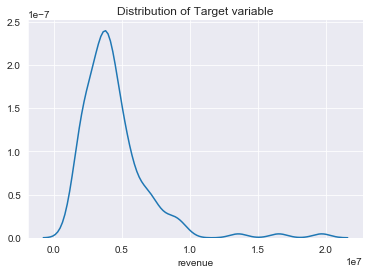

In [22]:
sns.distplot(raw_df['revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine(); 

In [23]:
#import statsmodels.formula.api as smf
#results = smf.ols('revenue ~ P1',data=train).fit()
#results.summary()

> I will try to remove the outliers so as to make the distribution normal 

In [24]:
raw_df = raw_df[raw_df['revenue']<8e+06].copy()

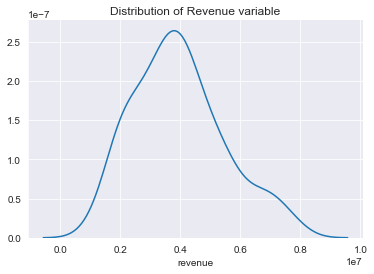

In [25]:
sns.distplot(raw_df['revenue'],hist=False)
plt.title('Distribution of Revenue variable')
sns.despine();

## Finding the pairwise correlation for all the numerical columns

In [26]:
abs(raw_df.corr()["revenue"].sort_values(ascending = False))

revenue    1.000000
P28        0.210405
P2         0.201090
P23        0.190282
P22        0.125914
P25        0.124055
P6         0.120781
P17        0.116518
P21        0.105242
P7         0.103906
P24        0.103867
P19        0.103533
P1         0.103259
P27        0.083365
P20        0.083143
P37        0.071540
P26        0.068106
P11        0.067380
P14        0.064443
P15        0.057521
P33        0.057366
P3         0.040939
P18        0.036850
P4         0.034333
P12        0.025004
P16        0.024814
P5         0.022639
P29        0.021268
P9         0.019613
P10        0.014902
P35        0.013754
P31        0.013128
P36        0.003964
P32        0.007603
P13        0.007647
P8         0.007859
P30        0.014967
P34        0.029703
Name: revenue, dtype: float64

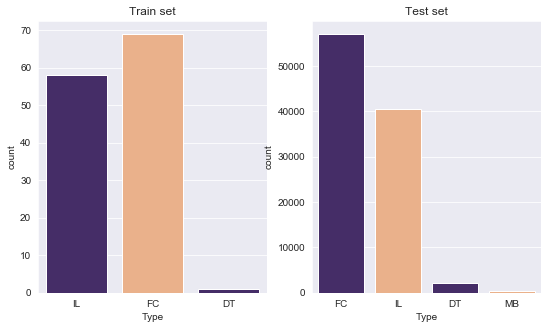

In [27]:
fig,ax = plt.subplots(1,2,figsize=(9,5))
sns.set_style('darkgrid')
sns.countplot(raw_df.Type,ax=ax[0],palette=['#432371',"#FAAE7B"])
ax[0].set_title('Train set')
sns.countplot(test_data.Type,ax=ax[1],palette=['#432371',"#FAAE7B"])
ax[1].set_title('Test set');

MB present in Test data but not in Train data. 

> Extracting month and year from the Open date column

In [28]:
#Create a checkpoint so that we can easily access original dataset
df = pd.concat([raw_df,test],axis=0)


df['Open Date'] = pd.to_datetime(df['Open Date'])
df['launch_Month'] = [x.month for x in df['Open Date']]
df['launch_year'] = [x.year for x in df['Open Date']]
df.drop(['Id','Open Date'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


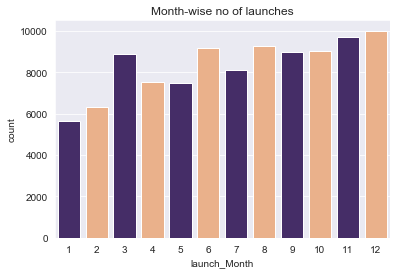

In [29]:
sns.countplot(df['launch_Month'], palette=['#432371',"#FAAE7B"])
plt.title('Month-wise no of launches');

## 2. Preprocessing 

In [30]:
df['Type'].value_counts()

FC    57088
IL    40505
DT     2245
MB      290
Name: Type, dtype: int64

In [31]:
df['Type'].value_counts()


FC    57088
IL    40505
DT     2245
MB      290
Name: Type, dtype: int64

In [32]:
df['City'].value_counts()

İstanbul     34130
Ankara        8739
İzmir         6472
Antalya       5915
Kocaeli       4365
             ...  
Tokat            1
Amasya           1
Kastamonu        1
Karabük          1
Osmaniye         1
Name: City, Length: 63, dtype: int64

Dropping 'City' column as 'City group' can cover this feature. Also 'City' column would have created 63 different columns

In [33]:
df.drop('City',axis=1,inplace=True)

> Converting categorical data. I am using OrdinalEncoder which encodes categorical features as an integer array.

In [34]:

df['Type'] = df['Type'].map({'FC':0,'IL':1,'DT':2,'MB':3})

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['City Group'] = encoder.fit_transform(np.array(df['City Group']).reshape(-1,1))
df['City Group'] = df['City Group'].apply(int)

In [35]:
df['City Group'].unique

<bound method Series.unique of 0        0
1        0
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    0
99998    0
99999    0
Name: City Group, Length: 100128, dtype: int64>

In [36]:
df['City Group'].nunique

<bound method IndexOpsMixin.nunique of 0        0
1        0
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    0
99998    0
99999    0
Name: City Group, Length: 100128, dtype: int64>

In [37]:
df.dropna().groupby('launch_Month')['revenue'].mean()

launch_Month
1     4.521243e+06
2     4.189109e+06
3     3.477052e+06
4     3.749950e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     4.526998e+06
10    4.056980e+06
11    4.403934e+06
12    3.720047e+06
Name: revenue, dtype: float64

In [38]:
df.groupby('launch_year')['revenue'].mean()

launch_year
1995             NaN
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2001             NaN
2002    4.991022e+06
2003             NaN
2004    3.482435e+06
2005    3.298470e+06
2006    3.360841e+06
2007    4.317164e+06
2008    4.588214e+06
2009    4.094408e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.540404e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

> Creating dummy variables

In [39]:

df.launch_year = df.launch_year.astype(str)
df.launch_Month = df.launch_Month.astype(str)
year_dummy = pd.get_dummies(df[['launch_year','launch_Month']],drop_first=True)
df = pd.concat([df,year_dummy],axis=1)
df.drop(['launch_year','launch_Month'],axis=1, inplace=True)

> Splitting the data

In [40]:

processed_df = df.dropna(axis=0)
processed_test_data = df[128:].drop('revenue',axis=1)


In [41]:
processed_df.shape


(128, 70)

In [42]:
processed_test_data.shape

(100000, 69)

In [43]:

processed_df.head()


,City Group,P1,P10,P11,P12,P13,P14,P15,P16,P17,...,launch_Month_11,launch_Month_12,launch_Month_2,launch_Month_3,launch_Month_4,launch_Month_5,launch_Month_6,launch_Month_7,launch_Month_8,launch_Month_9
0,0,4,5,3,5,5.0,1,2,2,2,...,0,0,0,0,0,0,0,1,0,0
1,0,4,5,1,5,5.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,2,5,2,5,5.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,6,10,8,10,7.5,6,4,9,3,...,0,0,1,0,0,0,0,0,0,0
4,1,3,5,2,5,5.0,2,1,2,1,...,0,0,0,0,0,1,0,0,0,0


In [44]:
#processed_df = processed_df.drop(['P27','P20', 'P37', 'P26', 'P11', 'P14', 'P15', 'P33', 'P3', 'P18', 'P4', 'P12' , 'P16', 'P5', 'P29' , 'P9', 'P10', 'P35', 'P31', 'P36', 'P32', 'P13', 'P8' ,'P30', 'P34'], axis=1)
#processed_df = processed_df.drop(['P27','P20', 'P37', 'P26', 'P11', 'P14'],axis=1)

In [45]:
processed_df.head()

,City Group,P1,P10,P11,P12,P13,P14,P15,P16,P17,...,launch_Month_11,launch_Month_12,launch_Month_2,launch_Month_3,launch_Month_4,launch_Month_5,launch_Month_6,launch_Month_7,launch_Month_8,launch_Month_9
0,0,4,5,3,5,5.0,1,2,2,2,...,0,0,0,0,0,0,0,1,0,0
1,0,4,5,1,5,5.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,2,5,2,5,5.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,6,10,8,10,7.5,6,4,9,3,...,0,0,1,0,0,0,0,0,0,0
4,1,3,5,2,5,5.0,2,1,2,1,...,0,0,0,0,0,1,0,0,0,0


In [46]:
abs(processed_df.corr()["revenue"].sort_values(ascending = True))

launch_year_2013    0.305885
City Group          0.127036
launch_year_2014    0.125475
launch_year_2012    0.109203
launch_Month_3      0.093526
                      ...   
launch_year_2000    0.209157
P28                 0.210405
revenue             1.000000
launch_year_2001         NaN
launch_year_2003         NaN
Name: revenue, Length: 70, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X=processed_df.drop('revenue',axis=1)
y=df['revenue'][:128]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12345)

In [48]:
import statsmodels.api as smf
results = smf.OLS(y_train,X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     1.566
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0749
Time:                        22:15:59   Log-Likelihood:                -1523.5
No. Observations:                 102   AIC:                             3181.
Df Residuals:                      35   BIC:                             3357.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
City Group       -1.567e+05   5.42e+05     -0.289      0.774   -1.26e+06    9.44e+05
P1                1.672e+05   2.86e+05      0.586      0.562   -4.13e+05    7.47e+05
P10              -8.166e+05   1.35e+06     -0.607      0.548   -3.55e+06    1.92e+06
P11              -2.011e+05   2.55e+05     -0.788      0.436   -7.19e+05    3.17e+05
P12              -4.117e+05   6.42e+05     -0.641      0.526   -1.72e+06    8.92e+05
P13               1.564e+05   1.19e+06      0.132      0.896   -2.26e+06    2.57e+06
P14              -2.727e+05   3.84e+05     -0.710      0.482   -1.05e+06    5.07e+05
P15              -4.904e+05   4.16e+05     -1.180      0.246   -1.33e+06    3.53e+05
P16               -1.68e+05   3.86e+05     -0.435      0.666   -9.52e+05    6.16e+05
P17               3.234e+05    3.7e+05      0.873      0.389   -4.29e+05    1.08e+06
P18              -8.559e+04   3.73e+05     -0.230      0.820   -8.42e+05    6.71e+05
P19              -9.046e+04   1.04e+05     -0.866      0.392   -3.02e+05    1.21e+05
P2                1.965e+05   3.27e+05      0.601      0.552   -4.67e+05     8.6e+05
P20              -1.568e+05   1.84e+05     -0.852      0.400   -5.31e+05    2.17e+05
P21                -7.8e+04   2.36e+05     -0.331      0.743   -5.57e+05    4.01e+05
P22              -1.206e+05   2.63e+05     -0.459      0.649   -6.54e+05    4.13e+05
P23               3.134e+05    1.4e+05      2.246      0.031    3.02e+04    5.97e+05
P24               1.621e+05   6.18e+05      0.262      0.795   -1.09e+06    1.42e+06
P25               2.711e+05   5.57e+05      0.487      0.629   -8.59e+05     1.4e+06
P26              -3.576e+05   7.18e+05     -0.498      0.622   -1.81e+06     1.1e+06
P27              -2.787e+04   2.26e+05     -0.123      0.903   -4.87e+05    4.31e+05
P28               2.774e+05   2.56e+05      1.085      0.285   -2.41e+05    7.96e+05
P29               1.968e+05   2.82e+05      0.697      0.490   -3.76e+05     7.7e+05
P3                2.761e+05   3.26e+05      0.847      0.403   -3.86e+05    9.38e+05
P30              -3.382e+05   2.18e+05     -1.552      0.130    -7.8e+05    1.04e+05
P31                4.15e+05   3.16e+05      1.313      0.198   -2.27e+05    1.06e+06
P32              -6.307e+05   2.88e+05     -2.191      0.035   -1.22e+06   -4.63e+04
P33               -8.28e+04   4.26e+05     -0.194      0.847   -9.47e+05    7.82e+05
P34              -1.442e+05   3.38e+05     -0.426      0.673   -8.31e+05    5.43e+05
P35               5.635e+05   3.81e+05      1.477      0.149   -2.11e+05    1.34e+06
P36               9.004e+05   6.43e+05      1.401      0.170   -4.04e+05    2.21e+06
P37               1.912e+05   3.14e+05      0.609      0.546   -4.46e+05    8.28e+05
P4                7680.2697   4.43e+05      0.017      0.986   -8.92e+05    9.08e+05
P5                3.051

## 3. Modeling

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          r2_score(y_test,pred)
                         ]
results

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,MAE,MSE,R2-score
Linear Regression,1.904764e+06,5.764211e+12,-1.274732
Logistic Regression,1.302039e+06,2.478689e+12,0.021835
Decision Tree,1.579316e+06,3.402134e+12,-0.342585
Support Vector Machines,1.407327e+06,2.555855e+12,-0.008618
K-nearest Neighbors,1.171290e+06,1.983233e+12,0.217356
XGBoost,1.074910e+06,1.959013e+12,0.226914


## GridSearchCV is used to find best parameters from the listed hyperparameters

## XGB

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
parameters = {'learning_rate': [.03, 0.05, .07,.09], 
              'max_depth': [6,7,8,9],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,700]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X,y)
y_pred = xgb_grid.predict(processed_test_data)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
submission = pd.DataFrame({
        "Id": test_data["Id"],
        "Prediction": y_pred
    })
submission.to_csv('SubmissionXGB.csv',header=True, index=False)
print('Done')

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.9s
[Parallel(n_jobs=5)]: Done  96 out of  96 | elapsed:    6.0s finished


0.06086269423406391
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}
Done


## KNN 

In [51]:
grid_params = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
    'leaf_size' : [30,40,50,60]
}

knn_grid = GridSearchCV(KNeighborsRegressor(),
                        grid_params,
                        cv = 3,
                        n_jobs = 3,
                        verbose = True
)
knn_grid.fit(X,y)
print(knn_grid.best_score_)
print(knn_grid.best_params_)
y_pred = knn_grid.predict(processed_test_data)

submission = pd.DataFrame({
        "Id": test_data["Id"],
        "Prediction": y_pred
    })
submission.to_csv('SubmissionKNN.csv',header=True, index=False)
print('Done')

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:    0.7s finished


0.17600376130361892
{'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Done


## **Conclusion**
The TFI competition was a tough challenge to overcome in terms of model selection. 

XGBoost and KNN are models that performed better than others. 

After turning in the submission, I got a score of **1802106.31825** for **XGBoost** model. And **1809001.48669** when using the **KNN** model. So, it is fair to say that XGBoost has performed well. 


## **Contribution**
> **Modeling** : Contributed towards the hyperparameter tuning of KNN and XGB

> **Preprocessing** : Contributed towards the month and year extraction of the data and encoding of the categorical variables. 

> **EDA** : Found the pairwise correlation between the target variable(revenue) and other variables. 

## **Citations** 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://www.kaggle.com/c/restaurant-revenue-prediction/overview

https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec

https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02




## **Licensing** 


Copyright 2020 Rohan Kapadnis

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.